In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import FigureCanvasBase
from matplotlib.lines import Line2D
import random
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
#pd.set_option('max_rows', 20)
import plotly.express as px 
import plotly.io as pio 
pio.renderers.default = 'browser'
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler 
from scipy import stats
import matplotlib.pyplot as plt

import ast

import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk 
from nltk.stem.porter import PorterStemmer

from warnings import simplefilter
simplefilter("ignore")


import plotly.express as px

In [2]:
df= pd.read_csv(r"C:\Users\Hp Pc\Downloads\archive\Top10VideoGameStocks.csv")

# DATA CLEANING AND MANIPULATION

In [3]:
df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


In [4]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [5]:
df.isnull().sum()

Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2.209000e+03
mean,56.082332,60.403246,52.123886,56.452762,54.255817,2.677228e+08
std,88.552277,95.086684,82.698684,88.816897,87.529546,4.027909e+08
min,0.032000,0.032000,0.025500,0.032000,0.025868,0.000000e+00
25%,8.374000,9.225000,7.520000,8.380000,7.123526,3.879940e+07
50%,22.362000,24.500000,20.070000,22.379999,18.641869,8.711250e+07
75%,57.276001,61.731998,53.959999,57.459999,55.368843,3.528646e+08
max,643.455811,714.899658,610.729919,628.245178,613.602234,3.044579e+09


In [7]:
df.shape

(2209, 10)

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [10]:
df['Months']=pd.to_datetime(df['Date']).dt.strftime('%b')

In [11]:
df['Months']

0       Jan
1       Feb
2       Mar
3       Apr
4       May
       ... 
2204    Jun
2205    Jul
2206    Aug
2207    Sep
2208    Oct
Name: Months, Length: 2209, dtype: object

In [12]:
df['Day of the week']=pd.to_datetime(df['Date']).dt.strftime('%a')

In [13]:
df['Day of the week']

0       Sat
1       Tue
2       Wed
3       Sat
4       Mon
       ... 
2204    Sat
2205    Mon
2206    Thu
2207    Sun
2208    Tue
Name: Day of the week, Length: 2209, dtype: object

In [14]:
df['Year']=pd.to_datetime(df['Date']).dt.strftime('%Y')

In [15]:
df['Year']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
2204    2024
2205    2024
2206    2024
2207    2024
2208    2024
Name: Year, Length: 2209, dtype: object

In [16]:
df['Year'].value_counts()

Year
2023    120
2022    120
2021    116
2024    100
2020     96
2019     96
2018     96
2017     96
2016     85
2013     84
2015     84
2014     84
2012     84
2011     84
2010     84
2009     84
2008     84
2007     84
2006     84
2005     84
2004     78
2001     72
2003     72
2002     72
2000     66
Name: count, dtype: int64

In [17]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year'],
      dtype='object')

In [18]:
df.drop('Date',axis=1,inplace=True)

In [19]:
df.columns

Index(['Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year'],
      dtype='object')

In [20]:
df['Daily Return']= df['Close'].pct_change()

In [21]:
df.columns

Index(['Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year',
       'Daily Return'],
      dtype='object')

In [22]:
df.head()

,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,Months,Day of the week,Year,Daily Return
0,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000,Jan,Sat,2000,NaN
1,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000,Feb,Tue,2000,0.239130
2,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000,Mar,Wed,2000,-0.106459
3,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000,Apr,Sat,2000,-0.194556
4,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500,May,Mon,2000,-0.191690


In [23]:
### Create column 'season' ###
Q1 = ['Jan','Feb','Mar']
Q2 = ['Apr','May','Jun']
Q3 = ['Jul','Aug','Sep']
Q4 = ['Oct','Nov','Dec']

def month_handler(row):
    if row['Months'] in Q1:
        return 'Q1'
    if row['Months'] in Q2:
        return 'Q2'
    if row['Months'] in Q3:
        return 'Q3'
    if row['Months'] in Q4:
        return 'Q4'
df['Season'] = df.apply(month_handler,axis=1)

In [24]:
df.columns

Index(['Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Months', 'Day of the week', 'Year',
       'Daily Return', 'Season'],
      dtype='object')

# DATA VISUALIZATION

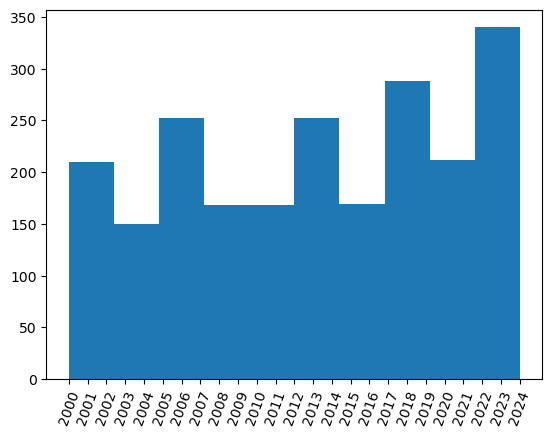

In [25]:
plt.hist(df['Year'])
plt.xticks(rotation=70)
plt.show()

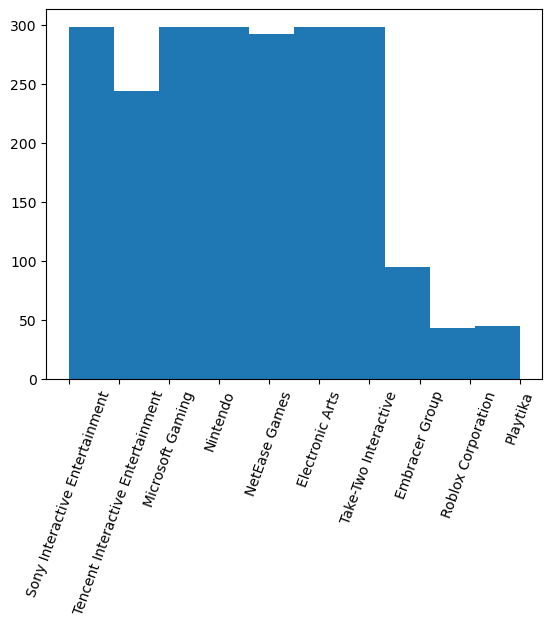

In [26]:
plt.hist(df['Company'])
plt.xticks(rotation=70)
plt.show()

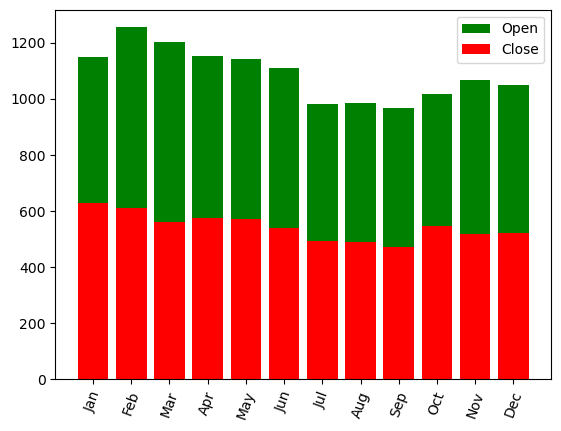

In [27]:
plt.bar(df['Months'],df['Open'],bottom=df['Close'],color='green',label='Open')
plt.bar(df['Months'],df['Close'], color='red',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

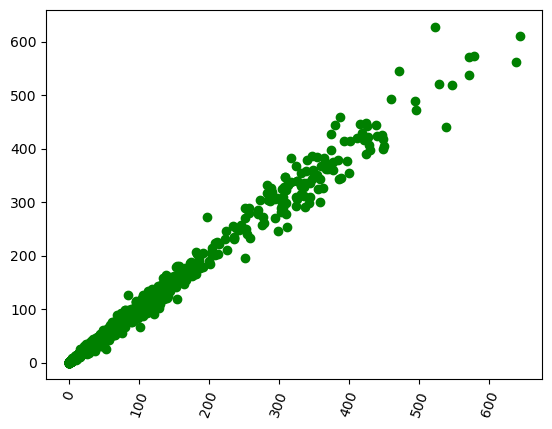

In [28]:
plt.scatter(df['Open'],df['Close'],color='green')

plt.xticks(rotation=70)
plt.show()

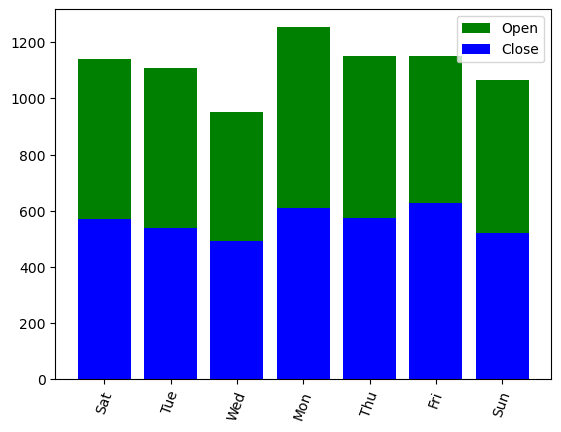

In [29]:
date = df['Day of the week']

plt.bar(date,df['Open'],bottom=df['Close'],color='green',label='Open')
plt.bar(date,df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

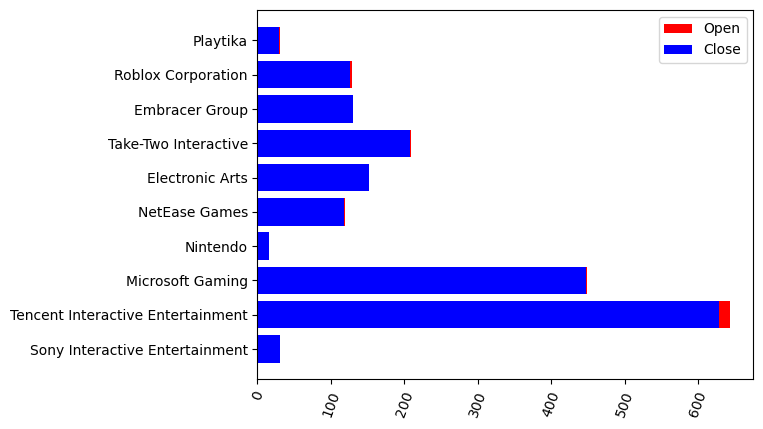

In [30]:
plt.barh(df['Company'],df['Open'],color='red',label='Open')
plt.barh(df['Company'],df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

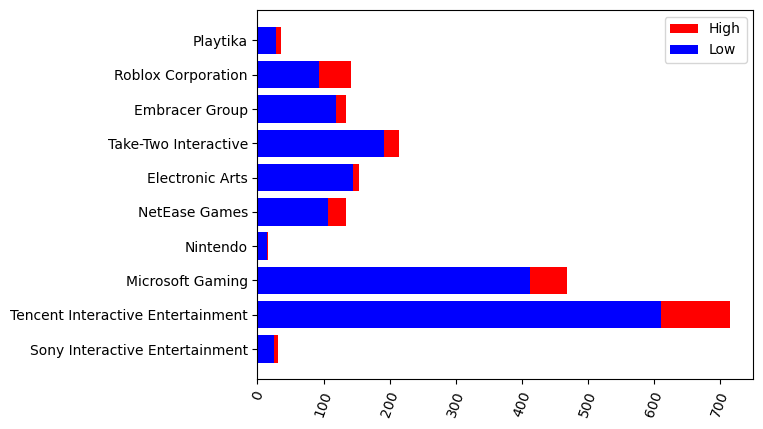

In [31]:
plt.barh(df['Company'],df['High'],color='red',label='High')
plt.barh(df['Company'],df['Low'], color='blue',label='Low')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

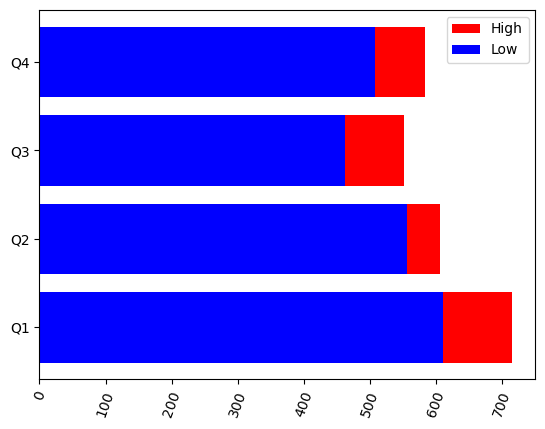

In [32]:
plt.barh(df['Season'],df['High'],color='red',label='High')
plt.barh(df['Season'],df['Low'], color='blue',label='Low')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

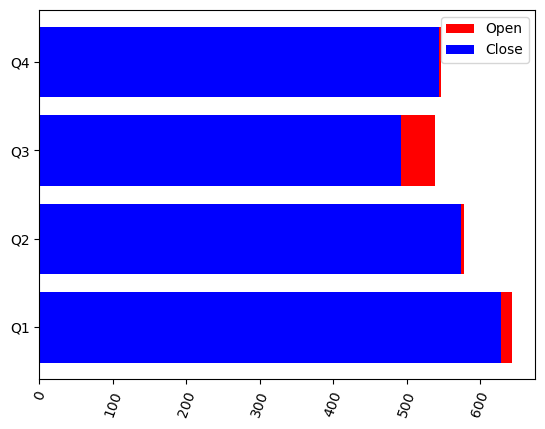

In [33]:
plt.barh(df['Season'],df['Open'],color='red',label='Open')
plt.barh(df['Season'],df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

In [34]:
df.dropna(inplace=True)

In [35]:
df.shape

(2208, 14)

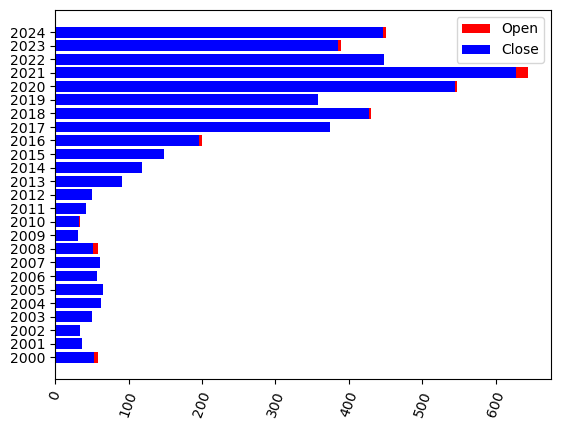

In [36]:
plt.barh(df['Year'],df['Open'],color='red',label='Open')
plt.barh(df['Year'],df['Close'], color='blue',label='Close')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

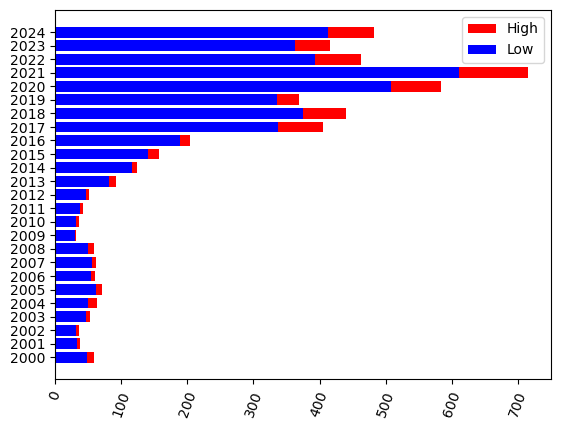

In [37]:
plt.barh(df['Year'],df['High'],color='red',label='High')
plt.barh(df['Year'],df['Low'], color='blue',label='Low')
plt.xticks(rotation=70)
plt.legend(loc= 'upper right')
plt.show()

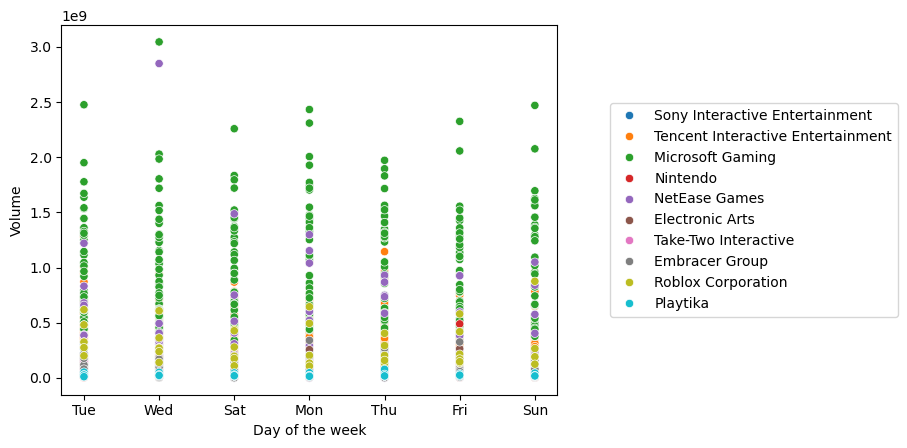

In [38]:
sns.scatterplot(data=df, x="Day of the week", y="Volume", hue="Company")
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

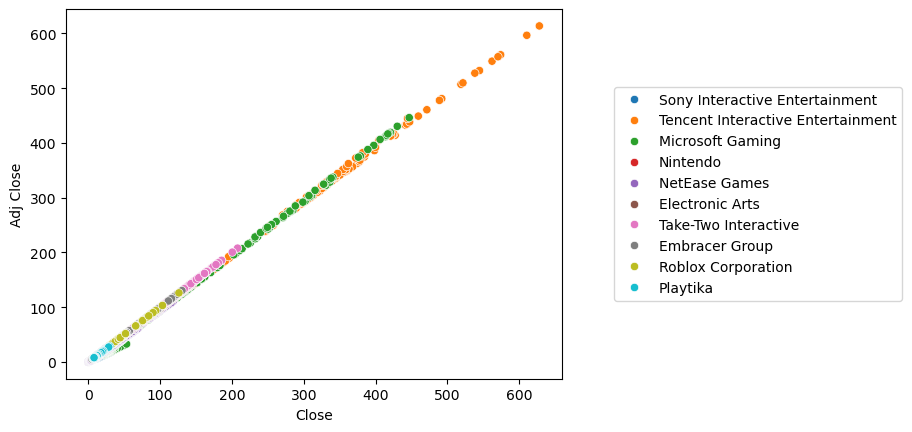

In [39]:
sns.scatterplot(data=df, x="Close", y="Adj Close", hue="Company")
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

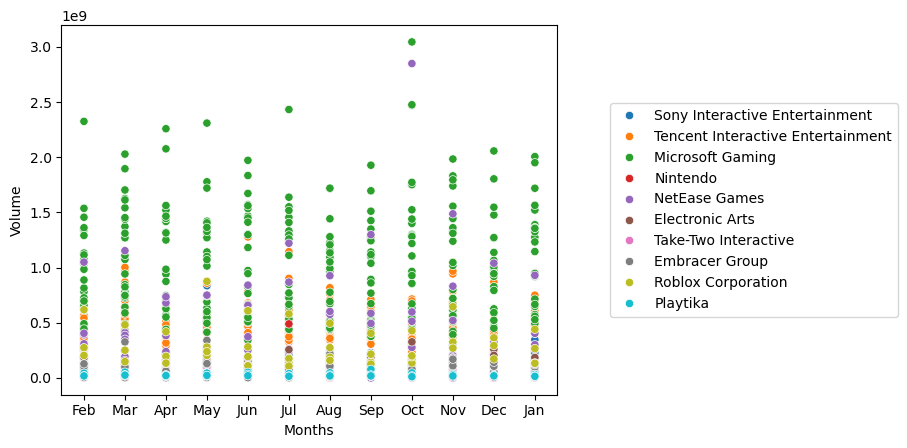

In [40]:
sns.scatterplot(data=df, x="Months", y="Volume", hue="Company")
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

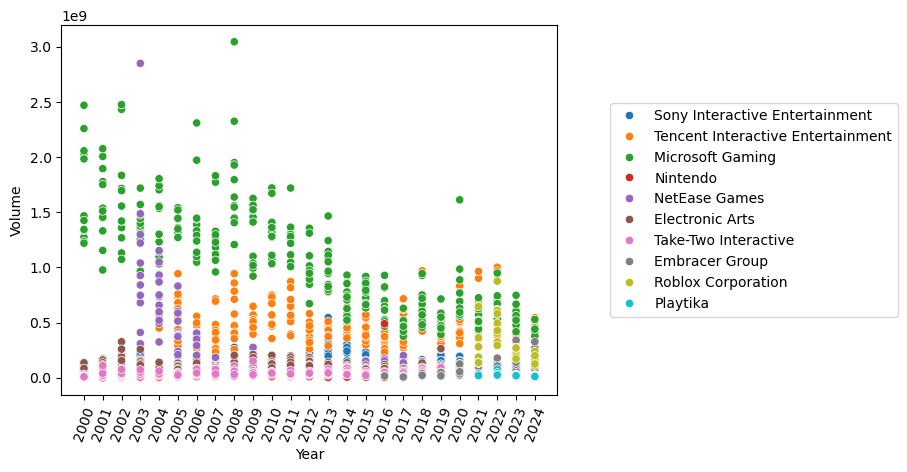

In [41]:
sns.scatterplot(data=df, x="Year", y="Volume", hue="Company")
plt.xticks(rotation=70)
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

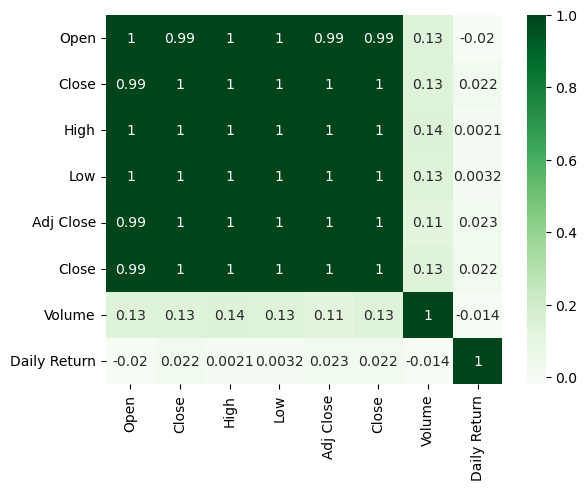

In [42]:
#Correlation Matrix
#Creating a correlation matrix using Baidu Core Revenu,Baidu Core total cost and Opearting Income Baidu Core as rows and coloumns
sns.heatmap(df[['Open','Close','High','Low','Adj Close','Close','Volume','Daily Return']].corr(),annot= True,cmap = 'Greens')
plt.show()
#In this visualiazation its observable that Baidu Core Revenu and Baidu Core total cost and expenses has a strong correlation of 0.87,which is good but
#not perfect.This only suggest there's a strong relationship between them,as one increases the other increases and vice versa


In [43]:
df['Currency'].value_counts()

Currency
USD    1572
JPY     297
HKD     244
SEK      95
Name: count, dtype: int64

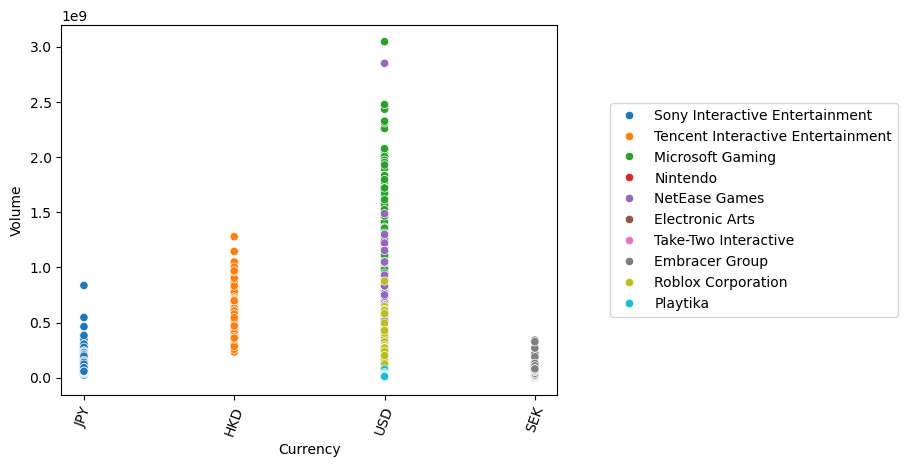

In [44]:
sns.scatterplot(data=df, x="Currency", y="Volume", hue="Company")
plt.xticks(rotation=70)
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.7, 1))
plt.show()

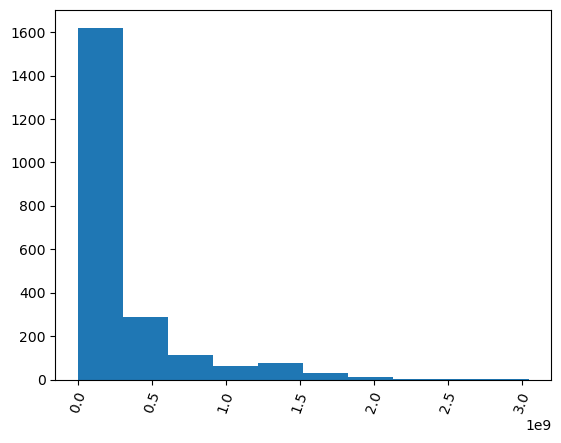

In [45]:
plt.hist(df['Volume'])
plt.xticks(rotation=70)
plt.show()

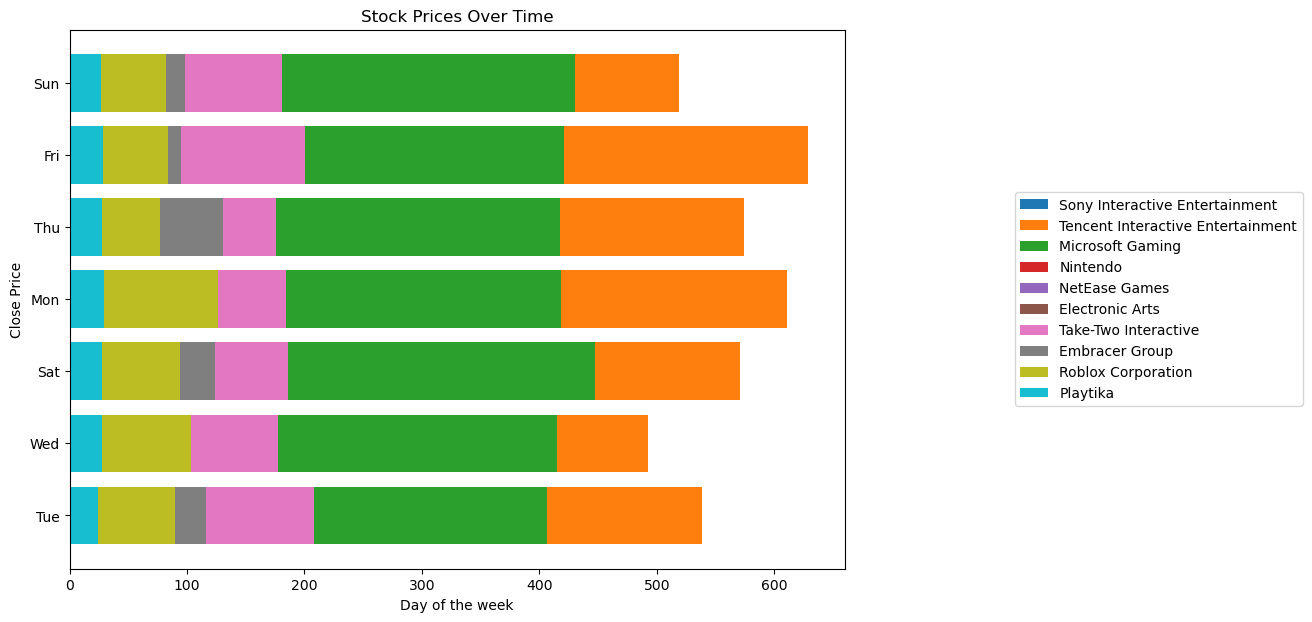

In [46]:
# stock prices over time
plt.figure(figsize=(10, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.barh(company_data['Day of the week'], company_data['Close'], label=company)
plt.title('Stock Prices Over Time')
plt.xlabel('Day of the week')
plt.ylabel('Close Price')
plt.legend(loc='center right',bbox_to_anchor= (1, 0, 0.6, 1))
plt.show()

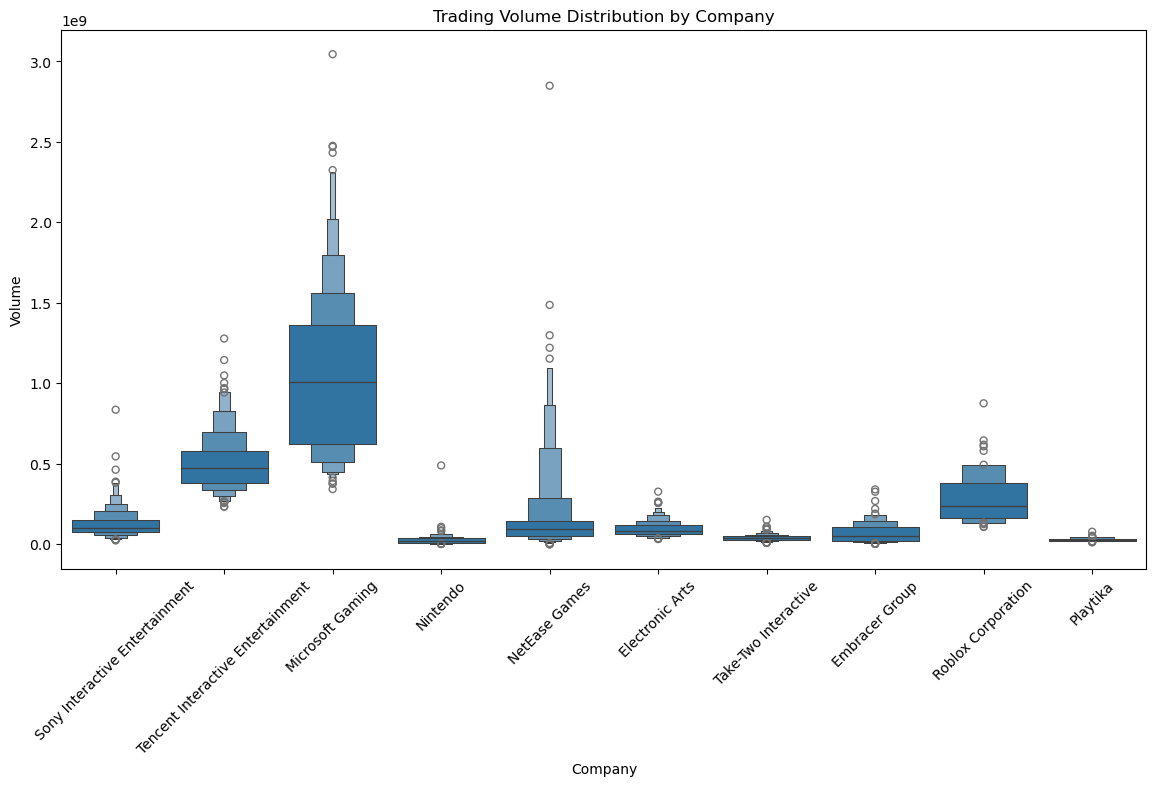

In [47]:
# Plot trading volume
plt.figure(figsize=(14, 7))
sns.boxenplot(x='Company', y='Volume', data=df)
plt.title('Trading Volume Distribution by Company')
plt.xticks(rotation=45)
plt.show()

# PREDICTIVE ANALYSIS

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#  data
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

17.67252487146945

# QUANTITATIVE ANALYSIS

In [50]:
df.pivot_table(index='Months',columns='Company',values='Volume',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Months                                                                      
Apr              2006066000      452592233      27558973800    3466194200   
Aug              2246570600      701725659      22661353500    4372373100   
Dec              2314946700      467793794      23466185900    3272531800   
Feb              2664118700      694838779      24763280700    3715878100   
Jan              2708440500      454968399      28468833000    3600534300   
Jul              2321050500      398687779      26256815800    4237593600   
Jun              2099619500      454459384      26740448900    3766660400   
Mar              2387450600      724755378      27926014100    4024604600   
May              2782366200      850363724      25831529000    3938847800   
Nov              2332419300      677744011      25494329600    4961043200   
Oct              2632877700      509147670      30090175800    5855169100   
Sep              2172508900      471199406      24275199000    4158589900   
Grand total     28668435200     6858276216     313533139100   49370020100   

                                                        \
Company        Nintendo    Playtika Roblox Corporation   
Months                                                   
Apr           571028100    91237700          881008400   
Aug           664251500   115520800         1115663200   
Dec           530738400    63590900          827495800   
Feb           586843400   111002600         1096436500   
Jan           649839600    63931600          839328100   
Jul          1023863500    92387700          996394500   
Jun           582941900   133106200         1192562100   
Mar           587685500   140552100          878938100   
May           617846300   103981700         1597949500   
Nov           579036200    81264000         1239758000   
Oct           571993400    92493300          955880400   
Sep           655565400   145909800          884953100   
Grand total  7621633200  1234978400        12506367700   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Months                                                            
Apr                             3158745500            757595450   
Aug                             2637937000            972956000   
Dec                             2419409000           1116593750   
Feb                             3088280000           1119289800   
Jan                             3469673500            916199100   
Jul                             2800876500            809548950   
Jun                             3185913500           1083745050   
Mar                             3320692500           1080654700   
May                             3772609000           1130072700   
Nov                             2890659000            947109950   
Oct                             3053360600            917208300   
Sep                             2644176000            952647600   
Grand total                    36442332100          11803621350   

                                                             
Company     Tencent Interactive Entertainment   Grand total  
Months                                                       
Apr                                9009364300   47952805683  
Aug                               10948105210   46436456569  
Dec                                8989960198   43469246242  
Feb                                8365571167   46205539746  
Jan                               10470987036   51642735135  
Jul                               10003452013   48940670842  
Jun                               10401633359   49641090293  
Mar                               12676659424   53748007002  
May                               10704215682   51329781606  
Nov                               12305975182

In [51]:
df.pivot_table(index='Day of the week',columns='Company',values='Volume',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company         Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Day of the week                                                                 
Fri                  3995305200     1092715304      41160164800    5576976600   
Mon                  4343951900     1221040479      47152733400    7791659500   
Sat                  3847013400      783572558      45127669200    6730976100   
Sun                  4109914500      862383131      43669325000    6252313500   
Thu                  3891494200     1008008172      46527986500    7218630700   
Tue                  4301691500      936287808      45565581300    7401071500   
Wed                  4179064500      954268764      44329678900    8398392200   
Grand total         28668435200     6858276216     313533139100   49370020100   

                                                            \
Company            Nintendo    Playtika Roblox Corporation   
Day of the week                                              
Fri              1416001500   154781300         1669304400   
Mon              1117537900   215390200         1717323800   
Sat              1097950100   157519700         1628939600   
Sun               966285800   124389100         1646050300   
Thu              1068068000   206999200         1519284700   
Tue               957364600   191578200         2180314900   
Wed               998425300   184320700         2145150000   
Grand total      7621633200  1234978400        12506367700   

                                                                     \
Company         Sony Interactive Entertainment Take-Two Interactive   
Day of the week                                                       
Fri                                 5197694500           1657917550   
Mon                                 5106803500           1571942550   
Sat                                 4871818500           1697874300   
Sun                                 5013548500           1650236700   
Thu                                 5018003500           1644725400   
Tue                                 5371069600           1821126250   
Wed                                 5863394000           1759798600   
Grand total                        36442332100          11803621350   

                                                                 
Company         Tencent Interactive Entertainment   Grand total  
Day of the week                                                  
Fri                                   16604989156   78525850310  
Mon                                   18119246875   88357630104  
Sat                                   15342174410   81285507868  
Sun                                   16079403049   80373849580  
Thu                                   18858193215   86961393587  
Tue                                   19624463038   88350548696  
Wed                                   18585295260   87397788224  
Grand total                          123213765003  591252568369

In [52]:
df.pivot_table(index='Year',columns='Company',values='Volume',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Year                                                                        
2000           1.139001e+09            NaN     2.009584e+10  2.652400e+08   
2001           1.512404e+09            NaN     1.891894e+10  2.607140e+08   
2002           2.108858e+09            NaN     1.937973e+10  6.649160e+08   
2003           1.715367e+09            NaN     1.639881e+10  1.210962e+10   
2004           1.094905e+09            NaN     1.683202e+10  8.655892e+09   
2005           1.086872e+09            NaN     1.678635e+10  5.157764e+09   
2006           9.334205e+08            NaN     1.683246e+10  2.680436e+09   
2007           9.332282e+08            NaN     1.566170e+10  1.514110e+09   
2008           1.421631e+09            NaN     2.129603e+10  1.541370e+09   
2009           2.020039e+09            NaN     1.573266e+10  2.372138e+09   
2010           1.589103e+09            NaN     1.589292e+10  1.140656e+09   
2011           1.687656e+09            NaN     1.529228e+10  1.170680e+09   
2012           1.614984e+09            NaN     1.198449e+10  9.769630e+08   
2013           1.201599e+09            NaN     1.225110e+10  8.264355e+08   
2014           1.066064e+09            NaN     8.399601e+09  6.972230e+08   
2015           8.593355e+08            NaN     9.059456e+09  1.057830e+09   
2016           9.071348e+08   1.649012e+07     7.819727e+09  1.496051e+09   
2017           7.431771e+08   8.186952e+07     5.631479e+09  1.634382e+09   
2018           1.007395e+09   2.530875e+08     7.929137e+09  1.357453e+09   
2019           1.111691e+09   3.502044e+08     6.194410e+09  8.982635e+08   
2020           7.474746e+08   5.731822e+08     9.527877e+09  8.930436e+08   
2021           6.416907e+08   1.061334e+09     6.555279e+09  7.459889e+08   
2022           5.478997e+08   1.159146e+09     7.836050e+09  5.440081e+08   
2023           5.428597e+08   1.907099e+09     6.918890e+09  3.412275e+08   
2024           4.346464e+08   1.455863e+09     4.305909e+09  3.676195e+08   
Grand total    2.866844e+10   6.858276e+09     3.135331e+11  4.937002e+10   

                                                            \
Company          Nintendo      Playtika Roblox Corporation   
Year                                                         
2000         8.087600e+07           NaN                NaN   
2001         8.725300e+07           NaN                NaN   
2002         5.926200e+07           NaN                NaN   
2003         7.476700e+07           NaN                NaN   
2004         1.158060e+08           NaN                NaN   
2005         1.761980e+08           NaN                NaN   
2006         2.709745e+08           NaN                NaN   
2007         2.311390e+08           NaN                NaN   
2008         4.982835e+08           NaN                NaN   
2009         6.308180e+08           NaN                NaN   
2010         2.615225e+08           NaN                NaN   
2011         2.810220e+08           NaN                NaN   
2012         1.633725e+08           NaN                NaN   
2013         1.243130e+08           NaN                NaN   
2014         1.186520e+08           NaN                NaN   
2015         1.477350e+08           NaN                NaN   
2016         8.354410e+08           NaN                NaN   
2017         4.884700e+08           NaN                NaN   
2018         4.895800e+08           NaN                NaN   
2019         4.999960e+08           NaN                NaN   
2020         5.742110e+08           NaN                NaN   
2021         5.937815e+08  2.654561e+08       2.299706e+09   
2022         3.792621e+08  5.097625e+08       5.964949e+09   
2023         2.586267e+08  2.758529e+08       2.684315e+09   
2024         1.802709e+08  1.839069e+08       1.557398e+09   
Grand total  7.621633e+09  1.234978e+09       1.250637

In [53]:
df.pivot_table(index='Day of the week',columns='Company',values='High',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company         Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Day of the week                                                                 
Fri                 2940.659997     686.228317      4143.028732   1487.196499   
Mon                 2941.189989     786.903331      4482.065008   1500.682063   
Sat                 2767.524379     679.778326      3928.314981   1306.676230   
Sun                 2775.298758     613.093324      3648.307510   1287.044882   
Thu                 2938.289993     690.571656      4039.652523   1390.650617   
Tue                 2869.878590     738.136656      3901.597500   1348.890317   
Wed                 2916.594970     750.991657      4240.717484   1528.804807   
Grand total        20149.436675    4945.703267     28383.683739   9849.945415   

                                                             \
Company             Nintendo    Playtika Roblox Corporation   
Day of the week                                               
Fri               306.687000   91.465001         300.800003   
Mon               318.442001  144.800000         365.960007   
Sat               298.396249   94.605000         382.099998   
Sun               289.780999   73.724999         247.299995   
Thu               321.051499  102.215001         390.770000   
Tue               318.619999  100.999002         369.655998   
Wed               289.308998  104.567999         433.430008   
Grand total      2142.286745  712.377003        2490.016010   

                                                                     \
Company         Sony Interactive Entertainment Take-Two Interactive   
Day of the week                                                       
Fri                                 445.908000          2566.401684   
Mon                                 449.880254          2620.678331   
Sat                                 436.387502          2314.460005   
Sun                                 409.271502          2254.661671   
Thu                                 444.323502          2457.606661   
Tue                                 461.749001          2446.834984   
Wed                                 451.598497          2464.795005   
Grand total                        3099.118258         17125.438340   

                                                                  
Company         Tencent Interactive Entertainment    Grand total  
Day of the week                                                   
Fri                                   6540.725130   19509.100362  
Mon                                   6835.211253   20445.812237  
Sat                                   5839.091860   18047.334531  
Sun                                   6055.380389   17653.864029  
Thu                                   6314.817534   19089.948986  
Tue                                   6263.751292   18820.113339  
Wed                                   6654.619319   19835.428744  
Grand total                          44503.596777  133401.602228

In [54]:
df.pivot_table(index='Months',columns='Company',values='High',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Months                                                                      
Apr             1623.931236     427.543322      2373.409967    801.919997   
Aug             1782.376115     438.353321      2490.372486    848.385311   
Dec             1565.029993     366.078330      2162.897497    767.736002   
Feb             1624.788746     431.501660      2290.761259    833.936123   
Jan             1631.781883     380.994998      2277.577511    812.248067   
Jul             1787.332466     420.776663      2523.077496    863.326237   
Jun             1735.247495     432.696653      2435.378750    843.842996   
Mar             1626.126255     406.453326      2301.742508    796.016502   
May             1694.928762     462.264991      2359.585005    829.920494   
Nov             1568.024992     374.566669      2164.397493    781.738322   
Oct             1752.568739     391.000004      2525.682507    841.818868   
Sep             1757.299993     413.473330      2478.801260    829.056496   
Grand total    20149.436675    4945.703267     28383.683739   9849.945415   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Months                                                    
Apr           178.434999   69.299999         222.580006   
Aug           179.968001   60.000000         229.169998   
Dec           173.978999   38.235001         213.310005   
Feb           175.253500   75.440001         166.869999   
Jan           177.783250   39.680000         187.049999   
Jul           187.745001   58.885001         222.779999   
Jun           181.771999   64.855000         222.125999   
Mar           178.033999   71.239000         141.145000   
May           178.910001   65.905001         219.099998   
Nov           166.588999   49.613000         230.740005   
Oct           179.709999   59.160001         219.660000   
Sep           184.107998   60.064999         215.485001   
Grand total  2142.286745  712.377003        2490.016010   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Months                                                            
Apr                             273.494002          1352.225000   
Aug                             256.888002          1516.988316   
Dec                             237.305501          1365.911675   
Feb                             279.479001          1422.790002   
Jan                             248.919001          1403.861662   
Jul                             261.003500          1452.078324   
Jun                             261.545498          1444.219982   
Mar                             274.340000          1358.518334   
May                             265.315251          1410.233338   
Nov                             235.476499          1382.036680   
Oct                             249.985501          1519.738348   
Sep                             255.366499          1496.836678   
Grand total                    3099.118258         17125.438340   

                                                              
Company     Tencent Interactive Entertainment    Grand total  
Months                                                        
Apr                               3716.015003   11038.853532  
Aug                               3724.091885   11526.593435  
Dec                               3379.627775   10270.110779  
Feb                               3778.815598   11079.635889  
Jan                               3770.681956   10930.578328  
Jul                               3841.578235   11618.582922  
Jun                               3831.585440   11453.269813  
Mar                               3761.518625   10915.133551  
May                               3755.365351   11241.528192  
Nov              

In [55]:
df.pivot_table(index='Year',columns='Company',values='High',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Year                                                                        
2000             290.792969            NaN       514.625000      2.356251   
2001             357.478750            NaN       405.983751      0.951188   
2002             396.500000            NaN       352.275000      2.249000   
2003             478.565001            NaN       328.409998     24.321000   
2004             633.820000            NaN       339.229998     29.581000   
2005             738.940002            NaN       320.890001     39.758000   
2006             660.830002            NaN       328.740000     50.695000   
2007             667.689995            NaN       386.780001     48.254000   
2008             550.349997            NaN       347.549997     56.500000   
2009             251.940001            NaN       294.740000     89.243999   
2010             214.870003            NaN       343.200001     96.014000   
2011             273.579998            NaN       327.930002    119.085999   
2012             193.040002            NaN       373.070000    137.808001   
2013             280.250000            NaN       408.200001    158.801998   
2014             438.519995            NaN       527.600002    207.642001   
2015             816.369991            NaN       589.629997    341.514000   
2016             925.889999       5.583333       689.899998    491.483999   
2017            1301.439995     128.249998       894.219994    754.213993   
2018            1509.430008     370.016655      1270.399994    667.834003   
2019            1223.289993     468.458319      1625.089973    672.660000   
2020            1550.200012     876.374996      2472.959976   1048.278000   
2021            1748.940002    1374.769981      3446.290009   1396.090004   
2022            1623.489975     974.059990      3466.670013   1152.379990   
2023            1577.259995     472.694994      3967.039993   1232.559990   
2024            1445.959991     275.495001      4362.260040   1029.669998   
Grand total    20149.436675    4945.703267     28383.683739   9849.945415   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Year                                                      
2000           57.756250         NaN                NaN   
2001           54.682500         NaN                NaN   
2002           43.230000         NaN                NaN   
2003           28.576000         NaN                NaN   
2004           36.230000         NaN                NaN   
2005           34.920000         NaN                NaN   
2006           57.130000         NaN                NaN   
2007          133.785999         NaN                NaN   
2008          157.785999         NaN                NaN   
2009           87.942000         NaN                NaN   
2010           91.666001         NaN                NaN   
2011           66.858000         NaN                NaN   
2012           40.502000         NaN                NaN   
2013           36.600000         NaN                NaN   
2014           36.692000         NaN                NaN   
2015           51.708000         NaN                NaN   
2016           62.858000         NaN                NaN   
2017           98.248000         NaN                NaN   
2018          119.225999         NaN                NaN   
2019          109.138000         NaN                NaN   
2020          149.068000         NaN                NaN   
2021          170.761999  310.475000         916.086006   
2022          141.091999  187.169001         630.539997   
2023          134.849998  132.368002         501.065006   
2024          140.980000   82.365000         442.325001   
Grand total  2142.286745  712.377003        2490.016010   

                                                                 \
Company    

In [56]:
df.pivot_table(index='Day of the week',columns='Company',values='Low',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company         Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Day of the week                                                                 
Fri                 2622.859993     545.513327      3736.973778   1230.588253   
Mon                 2539.664998     597.105664      4020.364985   1281.313761   
Sat                 2440.943741     534.986664      3447.537508   1104.097995   
Sun                 2413.500002     477.788674      3243.844966   1072.428491   
Thu                 2618.326872     584.793327      3642.648729   1163.939014   
Tue                 2520.255026     585.014997      3488.909956   1116.412761   
Wed                 2544.788741     605.867657      3797.088713   1265.596504   
Grand total        17700.339373    3931.070310     25377.368634   8234.376778   

                                                             \
Company             Nintendo    Playtika Roblox Corporation   
Day of the week                                               
Fri               265.532000   79.130000         232.909998   
Mon               266.040002  110.750999         256.158001   
Sat               257.656999   75.369999         256.670006   
Sun               249.524001   56.375000         192.574999   
Thu               273.925999   86.828001         307.804996   
Tue               273.248001   78.730001         250.904993   
Wed               248.124001   87.175001         322.259996   
Grand total      1834.051002  574.359001        1819.282990   

                                                                     \
Company         Sony Interactive Entertainment Take-Two Interactive   
Day of the week                                                       
Fri                                 391.636499          2203.374999   
Mon                                 395.440997          2239.246675   
Sat                                 378.704001          1988.906665   
Sun                                 354.728999          1953.678312   
Thu                                 387.005999          2086.570017   
Tue                                 398.938501          2087.605817   
Wed                                 391.096501          2122.584163   
Grand total                        2697.551498         14681.966647   

                                                                  
Company         Tencent Interactive Entertainment    Grand total  
Day of the week                                                   
Fri                                   5655.651300   16964.170146  
Mon                                   5862.371745   17568.457826  
Sat                                   5097.853658   15582.727236  
Sun                                   5215.528999   15229.972442  
Thu                                   5354.863829   16506.706782  
Tue                                   5365.409706   16165.429758  
Wed                                   5718.769097   17103.350374  
Grand total                          38270.448333  115120.814565

In [57]:
df.pivot_table(index='Months',columns='Company',values='Low',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Months                                                                      
Apr             1463.143112     356.316663      2086.481247    688.996494   
Aug             1578.444989     333.979999      2258.172462    698.276751   
Dec             1370.534992     305.919996      1979.446228    643.917012   
Feb             1421.059996     316.211661      2049.244995    689.689003   
Jan             1417.658751     311.537333      1986.074987    673.399257   
Jul             1578.553121     363.363332      2257.459988    723.951495   
Jun             1546.625642     360.106666      2183.216267    724.910008   
Mar             1426.463753     318.569999      2034.658774    670.366506   
May             1459.249999     319.133332      2139.437498    689.040003   
Nov             1364.631253     283.819335      1938.599972    649.044003   
Oct             1520.968761     319.303661      2224.568727    686.184497   
Sep             1553.005004     342.808332      2240.007488    696.601749   
Grand total    17700.339373    3931.070310     25377.368634   8234.376778   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Months                                                    
Apr           155.004001   57.930000         163.650002   
Aug           155.712001   47.079999         172.790998   
Dec           147.390000   32.190000         157.579998   
Feb           150.785000   59.195000         115.349998   
Jan           148.619000   30.390001         118.625002   
Jul           158.078000   51.980000         179.840000   
Jun           157.252000   53.228000         173.509996   
Mar           150.649000   55.210999         108.403996   
May           155.178000   51.539999         148.733000   
Nov           141.486001   32.890000         137.610001   
Oct           154.380001   51.515001         168.369997   
Sep           159.517998   51.210001         174.820002   
Grand total  1834.051002  574.359001        1819.282990   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Months                                                            
Apr                             234.364501          1180.246670   
Aug                             225.474500          1282.576655   
Dec                             212.783999          1187.603343   
Feb                             238.834001          1183.214167   
Jan                             213.649000          1214.106671   
Jul                             227.859499          1283.896669   
Jun                             230.071999          1263.149990   
Mar                             235.270000          1158.261659   
May                             231.898000          1182.133332   
Nov                             207.528500          1141.354168   
Oct                             215.475001          1295.881659   
Sep                             224.342499          1309.541665   
Grand total                    2697.551498         14681.966647   

                                                              
Company     Tencent Interactive Entertainment    Grand total  
Months                                                        
Apr                               3264.184328    9650.317017  
Aug                               3242.732436    9995.240791  
Dec                               2950.624639    8987.990206  
Feb                               3309.656214    9533.240037  
Jan                               3106.601491    9220.661494  
Jul                               3261.991058   10086.973162  
Jun                               3385.040021   10077.110587  
Mar                               3098.073073    9255.927759  
May                               3262.855562    9639.198725  
Nov              

In [58]:
df.pivot_table(index='Year',columns='Company',values='Low',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Year                                                                        
2000             205.296875            NaN       400.437500      1.212500   
2001             284.582499            NaN       336.316248      0.586250   
2002             332.440001            NaN       300.209999      1.215500   
2003             413.779995            NaN       294.044998     16.975000   
2004             556.630005            NaN       314.920002     23.021500   
2005             642.630005            NaN       299.330000     31.705500   
2006             579.509998            NaN       302.969999     41.902499   
2007             597.859997            NaN       349.620005     40.960000   
2008             445.369996            NaN       297.980003     44.046000   
2009             207.480000            NaN       255.650002     71.785999   
2010             186.459999            NaN       303.460001     80.934000   
2011             227.879998            NaN       298.880001     98.469999   
2012             160.140000            NaN       342.389997    116.501999   
2013             240.620001            NaN       370.430000    137.712001   
2014             380.490002            NaN       486.599998    181.138000   
2015             712.640003            NaN       525.859997    280.064001   
2016             826.129997       4.516666       629.259995    419.932001   
2017            1177.900002     102.233330       837.269981    638.590000   
2018            1293.019989     288.566663      1137.120003    561.556000   
2019            1072.890007     392.041660      1491.299988    580.104008   
2020            1355.040001     703.780003      2152.289993    896.174004   
2021            1580.370010    1141.244995      3142.029999   1114.680008   
2022            1434.840004     739.644993      2981.279968    924.410004   
2023            1446.669991     344.287998      3573.459976   1055.120003   
2024            1339.669998     214.754002      3954.259979    875.580002   
Grand total    17700.339373    3931.070310     25377.368634   8234.376778   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Year                                                      
2000           44.125000         NaN                NaN   
2001           44.670000         NaN                NaN   
2002           34.854000         NaN                NaN   
2003           22.148000         NaN                NaN   
2004           27.390000         NaN                NaN   
2005           31.650000         NaN                NaN   
2006           49.434000         NaN                NaN   
2007          110.666000         NaN                NaN   
2008          123.786001         NaN                NaN   
2009           75.808001         NaN                NaN   
2010           79.105999         NaN                NaN   
2011           56.816000         NaN                NaN   
2012           35.188000         NaN                NaN   
2013           31.420000         NaN                NaN   
2014           32.288000         NaN                NaN   
2015           42.678000         NaN                NaN   
2016           49.980000         NaN                NaN   
2017           85.502000         NaN                NaN   
2018          101.608000         NaN                NaN   
2019           98.396000         NaN                NaN   
2020          128.056001         NaN                NaN   
2021          152.319999  252.041000         667.629997   
2022          127.792001  143.230000         401.058998   
2023          122.509999  109.368001         389.783997   
2024          125.860001   69.720000         360.809998   
Grand total  1834.051002  574.359001        1819.282990   

                                                                 \
Company    

In [59]:
df.pivot_table(index='Day of the week',columns='Company',values='Close',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company         Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Day of the week                                                                 
Fri                 2795.354990     603.729995      3988.788750   1369.072013   
Mon                 2743.500019     693.254992      4220.017508   1373.912009   
Sat                 2630.436879     621.256660      3706.368788   1211.981624   
Sun                 2620.704997     566.556007      3511.287477   1219.981504   
Thu                 2760.874388     647.103330      3837.858774   1275.400745   
Tue                 2710.334388     670.003328      3742.563749   1234.729756   
Wed                 2748.850626     666.826667      4061.612497   1376.844999   
Grand total        19010.056287    4468.730979     27068.497543   9061.922650   

                                                             \
Company             Nintendo    Playtika Roblox Corporation   
Day of the week                                               
Fri               284.593000   83.530002         270.459997   
Mon               296.306002  116.819999         322.960003   
Sat               283.753001   83.720000         316.429996   
Sun               270.397001   68.009999         225.270000   
Thu               297.418627   94.490001         340.020008   
Tue               295.766000   90.810000         299.570007   
Wed               267.557000   96.450000         366.120007   
Grand total      1995.790632  633.830002        2140.830019   

                                                                     \
Company         Sony Interactive Entertainment Take-Two Interactive   
Day of the week                                                       
Fri                                 415.185498          2395.568337   
Mon                                 418.643501          2436.176655   
Sat                                 401.286000          2171.536686   
Sun                                 384.294002          2128.718327   
Thu                                 414.836497          2244.873752   
Tue                                 433.444003          2302.767922   
Wed                                 423.412499          2352.455018   
Grand total                        2891.102000         16032.096698   

                                                                  
Company         Tencent Interactive Entertainment    Grand total  
Day of the week                                                   
Fri                                   6122.562851   18328.845434  
Mon                                   6291.146361   18912.737050  
Sat                                   5509.945760   16936.715394  
Sun                                   5726.028688   16721.248004  
Thu                                   5815.147249   17728.023371  
Tue                                   5756.502425   17536.491580  
Wed                                   6154.661432   18514.790745  
Grand total                          41375.994767  124678.851578

In [60]:
df.pivot_table(index='Months',columns='Company',values='Close',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Months                                                                      
Apr             1542.290008     399.623338      2233.319984    752.154993   
Aug             1685.454399     386.681664      2394.981279    766.850757   
Dec             1475.312510     347.653337      2077.752516    707.857623   
Feb             1522.039989     374.060000      2150.987518    739.783868   
Jan             1539.013741     346.769992      2166.563753    755.912499   
Jul             1689.669380     396.361662      2375.831261    802.188625   
Jun             1650.859392     388.398330      2358.330004    797.772005   
Mar             1537.231859     385.254994      2224.073748    736.448384   
May             1634.018748     402.388335      2266.896250    769.100510   
Nov             1457.753743     327.096666      2085.582506    723.567011   
Oct             1626.590010     345.025995      2406.437485    752.444496   
Sep             1649.822507     369.416666      2327.741240    757.841880   
Grand total    19010.056287    4468.730979     27068.497543   9061.922650   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Months                                                    
Apr           165.926003   62.610001         176.360003   
Aug           171.374001   54.250000         193.440006   
Dec           160.568000   34.520001         177.340004   
Feb           163.000624   67.360001         128.110001   
Jan           162.807003   34.740000         141.880001   
Jul           169.811001   54.070000         200.680004   
Jun           169.916001   56.550000         200.350002   
Mar           166.336000   64.849999         129.400002   
May           169.393000   61.010000         199.189997   
Nov           158.411000   35.340000         197.180000   
Oct           167.161000   53.960000         212.289999   
Sep           171.087000   54.570000         184.610001   
Grand total  1995.790632  633.830002        2140.830019   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Months                                                            
Apr                             247.584500          1238.863342   
Aug                             242.771999          1434.736253   
Dec                             226.677999          1300.133328   
Feb                             259.358001          1258.261678   
Jan                             230.924000          1328.039990   
Jul                             244.599500          1390.374996   
Jun                             241.334498          1348.243346   
Mar                             257.354500          1279.967094   
May                             248.085500          1356.378325   
Nov                             223.906001          1273.911662   
Oct                             234.010003          1428.751665   
Sep                             234.495500          1394.435019   
Grand total                    2891.102000         16032.096698   

                                                              
Company     Tencent Interactive Entertainment    Grand total  
Months                                                        
Apr                               3531.140117   10349.872288  
Aug                               3508.047498   10838.587856  
Dec                               3238.803702    9746.619019  
Feb                               3435.041276   10098.002956  
Jan                               3537.419904   10244.070884  
Jul                               3537.241670   10860.828098  
Jun                               3596.430056   10808.183634  
Mar                               3430.780842   10211.697423  
May                               3486.235166   10592.695830  
Nov              

In [61]:
df.pivot_table(index='Year',columns='Company',values='Close',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Year                                                                        
2000             250.500000            NaN       437.687500      1.459375   
2001             327.821247            NaN       373.850000      0.720250   
2002             364.470001            NaN       321.940002      1.984000   
2003             456.855003            NaN       307.409998     20.926000   
2004             605.160004            NaN       324.969995     27.026000   
2005             680.469994            NaN       309.799999     35.093500   
2006             616.300003            NaN       317.369999     46.709500   
2007             630.669994            NaN       370.189999     44.444000   
2008             477.540005            NaN       314.219999     52.040000   
2009             226.619996            NaN       278.049999     82.497999   
2010             196.530001            NaN       319.100000     87.556000   
2011             254.530003            NaN       313.689997    110.710000   
2012             171.480001            NaN       357.250000    128.254001   
2013             264.220001            NaN       395.870003    152.186001   
2014             422.270000            NaN       516.340008    197.264001   
2015             772.240005            NaN       561.509998    318.284002   
2016             888.730003       5.533333       669.299992    459.908001   
2017            1260.629990     117.133330       876.569988    700.077995   
2018            1378.420013     335.349989      1223.069992    597.242001   
2019            1167.560005     430.723330      1588.250015    633.066002   
2020            1481.330009     824.695007      2335.750000    976.523998   
2021            1669.169998    1265.830002      3340.110016   1265.469994   
2022            1520.339996     841.294991      3226.499985   1037.270008   
2023            1520.389992     400.195999      3834.210037   1151.530014   
2024            1405.810020     247.974998      4155.490021    933.680008   
Grand total    19010.056287    4468.730979     27068.497543   9061.922650   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Year                                                      
2000           51.325000         NaN                NaN   
2001           50.175626         NaN                NaN   
2002           37.988000         NaN                NaN   
2003           24.510000         NaN                NaN   
2004           32.910000         NaN                NaN   
2005           33.268000         NaN                NaN   
2006           55.668000         NaN                NaN   
2007          129.790001         NaN                NaN   
2008          138.800002         NaN                NaN   
2009           80.040001         NaN                NaN   
2010           85.955999         NaN                NaN   
2011           60.290000         NaN                NaN   
2012           37.626000         NaN                NaN   
2013           33.866000         NaN                NaN   
2014           33.988000         NaN                NaN   
2015           46.440000         NaN                NaN   
2016           55.760000         NaN                NaN   
2017           93.185999         NaN                NaN   
2018          111.428001         NaN                NaN   
2019          105.039999         NaN                NaN   
2020          141.364000         NaN                NaN   
2021          158.842000  275.030001         806.160011   
2022          133.679999  162.190001         479.970005   
2023          129.540000  120.120000         449.929998   
2024          134.310001   76.490000         404.770004   
Grand total  1995.790632  633.830002        2140.830019   

                                                                 \
Company    

In [62]:
df.pivot_table(index='Day of the week',columns='Company',values='Adj Close',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company         Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Day of the week                                                                 
Fri                 2743.963991     603.729995      3684.283841   1258.124564   
Mon                 2695.161048     693.254992      3924.063762   1270.387187   
Sat                 2581.866571     621.256660      3384.788221   1114.109140   
Sun                 2571.523094     566.556007      3215.897367   1116.662042   
Thu                 2711.425344     647.103330      3532.897980   1173.137917   
Tue                 2659.303399     670.003328      3424.703212   1132.320977   
Wed                 2698.580944     666.826667      3763.113626   1267.372107   
Grand total        18661.824391    4468.730979     24929.748008   8332.113932   

                                                             \
Company             Nintendo    Playtika Roblox Corporation   
Day of the week                                               
Fri               283.289477   80.343692         270.459997   
Mon               295.115699  112.661326         322.960003   
Sat               282.198500   80.634580         316.429996   
Sun               269.287477   65.621119         225.270000   
Thu               296.116014   91.081945         340.020008   
Tue               294.420102   87.644669         299.570007   
Wed               266.452978   92.890942         366.120007   
Grand total      1986.880247  610.878273        2140.830019   

                                                                     \
Company         Sony Interactive Entertainment Take-Two Interactive   
Day of the week                                                       
Fri                                 335.167257          2395.551804   
Mon                                 343.870854          2436.162054   
Sat                                 318.838845          2171.520988   
Sun                                 310.593634          2128.703172   
Thu                                 331.152095          2244.857812   
Tue                                 341.803285          2302.750563   
Wed                                 344.847489          2352.441297   
Grand total                        2326.273460         16031.987689   

                                                                  
Company         Tencent Interactive Entertainment    Grand total  
Day of the week                                                   
Fri                                   5964.566673   17619.481292  
Mon                                   6139.909268   18233.546193  
Sat                                   5373.546187   16245.189688  
Sun                                   5579.873860   16049.987773  
Thu                                   5674.048115   17041.840559  
Tue                                   5613.450102   16825.969643  
Wed                                   6001.903172   17820.549228  
Grand total                          40347.297378  119836.564376

In [63]:
df.pivot_table(index='Months',columns='Company',values='Adj Close',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Months                                                                      
Apr             1513.867945     399.623338      2052.822771    692.327631   
Aug             1655.085554     386.681664      2216.656711    706.542789   
Dec             1447.489695     347.653337      1909.433162    647.097801   
Feb             1493.446559     374.060000      1967.918110    679.252053   
Jan             1510.250561     346.769992      1976.996148    694.405314   
Jul             1659.468376     396.361662      2198.421783    739.930864   
Jun             1620.754589     388.398330      2179.490011    734.447812   
Mar             1508.655569     385.254994      2042.434215    676.203380   
May             1603.868398     402.388335      2089.049774    707.251760   
Nov             1430.019108     327.096666      1907.544042    661.726770   
Oct             1598.254573     345.025995      2228.847507    693.737889   
Sep             1620.663465     369.416666      2160.133774    699.189869   
Grand total    18661.824391    4468.730979     24929.748008   8332.113932   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Months                                                    
Apr           165.190316   60.321320         176.360003   
Aug           170.641896   52.376929         193.440006   
Dec           159.936389   33.203212         177.340004   
Feb           162.126938   64.790507         128.110001   
Jan           161.981120   33.414817         141.880001   
Jul           169.060122   52.205350         200.680004   
Jun           169.114974   54.501001         200.350002   
Mar           165.506988   62.376246         129.400002   
May           168.634954   58.802825         199.189997   
Nov           157.787755   33.991929         197.180000   
Oct           166.551002   52.200338         212.289999   
Sep           170.347794   52.693798         184.610001   
Grand total  1986.880247  610.878273        2140.830019   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Months                                                            
Apr                             196.420259          1238.853910   
Aug                             196.232933          1434.726630   
Dec                             184.983057          1300.125275   
Feb                             202.892052          1258.252569   
Jan                             188.082645          1328.031626   
Jul                             198.352240          1390.365857   
Jun                             193.480108          1348.233756   
Mar                             202.054266          1279.957121   
May                             197.909055          1356.368236   
Nov                             182.324186          1273.903533   
Oct                             192.875405          1428.743229   
Sep                             190.667252          1394.425947   
Grand total                    2326.273460         16031.987689   

                                                              
Company     Tencent Interactive Entertainment    Grand total  
Months                                                        
Apr                               3437.968024    9933.755517  
Aug                               3427.848712   10440.233824  
Dec                               3154.115617    9361.377547  
Feb                               3344.216176    9675.064965  
Jan                               3444.691760    9826.503985  
Jul                               3456.081250   10460.927508  
Jun                               3515.048860   10403.819444  
Mar                               3340.481904    9792.324684  
May                               3393.529643   10176.992976  
Nov              

In [64]:
df.pivot_table(index='Year',columns='Company',values='Adj Close',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Year                                                                        
2000             245.007898            NaN       269.875440      1.179743   
2001             320.633902            NaN       230.513656      0.582242   
2002             356.479155            NaN       198.506234      1.603844   
2003             446.838657            NaN       190.246771     16.916353   
2004             591.892105            NaN       204.256248     21.847525   
2005             665.550983            NaN       216.648405     28.369206   
2006             602.787853            NaN       224.893166     37.759453   
2007             616.842834            NaN       266.034370     35.928049   
2008             467.070127            NaN       228.928227     42.068575   
2009             221.651441            NaN       207.629870     66.690495   
2010             192.221160            NaN       242.799074     70.779328   
2011             248.949534            NaN       244.332996     89.496768   
2012             167.720382            NaN       285.782269    103.679141   
2013             258.427072            NaN       326.565229    125.697130   
2014             413.011915            NaN       438.326509    166.819499   
2015             755.308971            NaN       489.490406    273.733381   
2016             869.244976       5.533333       599.367958    401.656401   
2017            1232.991196     117.133330       804.967339    619.699879   
2018            1348.198723     335.349989      1144.975700    533.330193   
2019            1141.961678     430.723330      1511.429733    570.622009   
2020            1448.852524     824.695007      2250.338684    910.140114   
2021            1637.870224    1265.830002      3249.266327   1189.229485   
2022            1499.799515     841.294991      3163.188477    985.772694   
2023            1509.447136     400.195999      3797.017944   1115.656830   
2024            1403.064430     247.974998      4144.366974    922.855598   
Grand total    18661.824391    4468.730979     24929.748008   8332.113932   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Year                                                      
2000           48.766720         NaN                NaN   
2001           47.719939         NaN                NaN   
2002           36.350162         NaN                NaN   
2003           23.628672         NaN                NaN   
2004           32.111850         NaN                NaN   
2005           32.846598         NaN                NaN   
2006           55.510301         NaN                NaN   
2007          129.790001         NaN                NaN   
2008          138.800002         NaN                NaN   
2009           80.040001         NaN                NaN   
2010           85.955999         NaN                NaN   
2011           60.290000         NaN                NaN   
2012           37.626000         NaN                NaN   
2013           33.866000         NaN                NaN   
2014           33.988000         NaN                NaN   
2015           46.440000         NaN                NaN   
2016           55.760000         NaN                NaN   
2017           93.185999         NaN                NaN   
2018          111.428001         NaN                NaN   
2019          105.039999         NaN                NaN   
2020          141.364000         NaN                NaN   
2021          158.842000  264.538786         806.160011   
2022          133.679999  156.003147         479.970005   
2023          129.540000  115.537936         449.929998   
2024          134.310001   74.798403         404.770004   
Grand total  1986.880247  610.878273        2140.830019   

                                                                 \
Company    

In [65]:
df.pivot_table(index='Day of the week',columns='Company',values='Daily Return',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company         Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Day of the week                                                                 
Fri                    0.617177       0.273005         0.438810      1.970724   
Mon                    0.096687       0.450976         0.661419      0.959736   
Sat                   -0.500952       0.215020        -1.211453     -1.278725   
Sun                    0.369741       0.220287         0.937492      2.095926   
Thu                    0.669842      -0.424045         0.201652      1.044513   
Tue                    0.721819       0.571811         0.449351      2.026095   
Wed                    0.736375       0.602560         0.710227      1.248577   
Grand total            2.710690       1.909614         2.187498      8.066845   

                                                        \
Company          Nintendo  Playtika Roblox Corporation   
Day of the week                                          
Fri              0.596240 -0.198721           0.225047   
Mon              1.587489 -1.214916           0.483763   
Sat             -0.221645 -0.203379           0.016755   
Sun              0.659672  0.180746           0.454695   
Thu             -0.404008 -0.079336           1.145583   
Tue             -0.359461 -0.176842          -0.761331   
Wed             -0.378828  0.274326           0.229910   
Grand total      1.479458 -1.418123           1.794422   

                                                                     \
Company         Sony Interactive Entertainment Take-Two Interactive   
Day of the week                                                       
Fri                                   0.035309             1.310417   
Mon                                   0.230519             1.460516   
Sat                                  -0.667103            -1.443455   
Sun                                   0.189079             0.573472   
Thu                                   0.258112             0.170855   
Tue                                   0.391991             0.978958   
Wed                                   0.719681             1.704469   
Grand total                           1.157586             4.755232   

                                                               
Company         Tencent Interactive Entertainment Grand total  
Day of the week                                                
Fri                                      0.940899    6.208907  
Mon                                      1.400568    6.116756  
Sat                                      0.285771   -5.009168  
Sun                                      1.826464    7.507573  
Thu                                      0.147196    2.730364  
Tue                                      0.646121    4.488512  
Wed                                      1.671306    7.518602  
Grand total                              6.918324   29.561547

In [66]:
df.pivot_table(index='Months',columns='Company',values='Daily Return',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Months                                                                      
Apr                0.032347       0.559180         0.549102      1.768959   
Aug                0.590616       0.158601         0.220727      0.620655   
Dec                0.202250      -0.661891        -0.145115     -0.084927   
Feb                0.492214       1.013180        -0.547658      0.444750   
Jan               -0.296783       0.228455        -0.418132      1.312779   
Jul                0.577653       0.355646         0.139357     -0.193338   
Jun                0.138574      -0.163661         0.816999      0.623177   
Mar                0.541955       0.386239         0.607656      0.204968   
May                1.555485       0.445677        -0.168121      1.345449   
Nov               -0.390154       0.374197         0.290300      1.910146   
Oct               -0.146021      -0.597852         1.322350      0.157239   
Sep               -0.587445      -0.188157        -0.479968     -0.043012   
Grand total        2.710690       1.909614         2.187498      8.066845   

                                                    \
Company      Nintendo  Playtika Roblox Corporation   
Months                                               
Apr         -0.155303 -0.153116           0.813235   
Aug          0.275420 -0.145118          -0.242867   
Dec          0.044841 -0.090786          -0.123043   
Feb          0.284161 -0.273684          -0.204208   
Jan         -1.249395  0.045611          -0.205263   
Jul          0.282880 -0.141982           0.251750   
Jun          0.406611 -0.179900           0.126625   
Mar          0.913120 -0.022695           0.081158   
May          0.455682  0.038353           0.355936   
Nov          0.782226 -0.357273           0.446711   
Oct         -0.661951 -0.109175           0.627398   
Sep          0.101167 -0.028359          -0.133009   
Grand total  1.479458 -1.418123           1.794422   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Months                                                            
Apr                              -0.551875            -0.687592   
Aug                              -0.508900             1.275362   
Dec                               0.332912            -0.073367   
Feb                               0.371573             0.435497   
Jan                               0.896559            -0.482395   
Jul                               0.329681             0.287089   
Jun                              -0.392796            -0.598659   
Mar                               0.452937             1.638079   
May                               0.263337             1.923090   
Nov                               0.395187            -0.005421   
Oct                               0.239653             1.546322   
Sep                              -0.670681            -0.502773   
Grand total                       1.157586             4.755232   

                                                           
Company     Tencent Interactive Entertainment Grand total  
Months                                                     
Apr                                  1.270095    3.445031  
Aug                                  0.336236    2.580731  
Dec                                  0.744503    0.145378  
Feb                                  0.064009    2.079834  
Jan                                  1.313485    1.144922  
Jul                                 -0.322839    1.565896  
Jun                                  0.244409    1.021379  
Mar                                  0.592608    5.396024  
May                                  0.866189    7.081076  
Nov                                  0.638008    4.083928  
Oct                                  0.565865    2.943828  
Sep          

In [67]:
df.pivot_table(index='Year',columns='Company',values='Daily Return',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Year                                                                        
2000              -0.494810            NaN        -1.477368     -1.487546   
2001               0.399714            NaN         0.554043     -1.144027   
2002              -0.116111            NaN        -0.184941      3.831907   
2003               0.694092            NaN         0.069593      1.532397   
2004               0.310548            NaN        -0.014450      0.465576   
2005              -0.135044            NaN        -0.008676      0.199276   
2006               0.027207            NaN         0.152171      0.398364   
2007               0.163172            NaN         0.217206      0.056058   
2008              -1.089468            NaN        -0.559648      0.245561   
2009               0.144497            NaN         0.489431      0.648416   
2010              -0.031143            NaN        -0.041575      0.025635   
2011               0.292782            NaN        -0.061644      0.306385   
2012              -0.277700            NaN         0.050796     -0.008183   
2013               0.529724            NaN         0.359762      0.648946   
2014               0.783487            NaN         0.222083      0.260048   
2015               0.408034            NaN         0.233514      0.698371   
2016               0.172806      -0.965784         0.134260      0.251698   
2017               0.325100       1.002582         0.330279      0.537066   
2018              -0.203148       0.826054         0.191089     -0.306937   
2019               0.339091       0.444394         0.457396      0.319561   
2020               0.323377       1.090881         0.373049      0.471943   
2021              -0.072271       0.051926         0.439646      0.118898   
2022              -0.037458      -0.587225        -0.307265     -0.232685   
2023               0.145750      -0.212475         0.476639      0.328098   
2024               0.108464       0.259262         0.092108     -0.097980   
Grand total        2.710690       1.909614         2.187498      8.066845   

                                                    \
Company      Nintendo  Playtika Roblox Corporation   
Year                                                 
2000        -1.073042       NaN                NaN   
2001         0.171464       NaN                NaN   
2002        -0.536141       NaN                NaN   
2003         0.031247       NaN                NaN   
2004         0.323278       NaN                NaN   
2005        -0.020065       NaN                NaN   
2006         0.802579       NaN                NaN   
2007         0.927452       NaN                NaN   
2008        -0.326728       NaN                NaN   
2009        -0.429076       NaN                NaN   
2010         0.254974       NaN                NaN   
2011        -0.684495       NaN                NaN   
2012        -0.197540       NaN                NaN   
2013         0.274405       NaN                NaN   
2014        -0.217479       NaN                NaN   
2015         0.402263       NaN                NaN   
2016         0.529789       NaN                NaN   
2017         0.601754       NaN                NaN   
2018        -0.230390       NaN                NaN   
2019         0.442676       NaN                NaN   
2020         0.536700       NaN                NaN   
2021        -0.292056 -0.829145           1.918134   
2022        -0.099093 -0.637581          -0.956593   
2023         0.253954  0.112033           0.665432   
2024         0.033027 -0.063430           0.167450   
Grand total  1.479458 -1.418123           1.794422   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Year                                                              
2000                  

In [71]:
df.pivot_table(index='Day of the week',columns='Company',values='Open',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company         Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Day of the week                                                                 
Fri                 2766.101082     612.258340      3915.996243   1342.979378   
Mon                 2764.453751     683.098331      4224.244976   1392.908746   
Sat                 2587.918770     622.414996      3704.249985   1203.018993   
Sun                 2589.142494     557.091660      3418.066222   1153.371478   
Thu                 2784.191864     628.676660      3830.944973   1276.355599   
Tue                 2679.627508     681.823334      3717.603764   1259.455738   
Wed                 2714.649991     670.453000      3949.632490   1393.086731   
Grand total        18886.085460    4455.816321     26760.738652   9021.176663   

                                                             \
Company             Nintendo    Playtika Roblox Corporation   
Day of the week                                               
Fri               284.666998   86.300001         264.690001   
Mon               287.922001  133.360001         281.579998   
Sat               278.463999   86.440000         330.430004   
Sun               266.657001   65.550000         209.040001   
Thu               301.107625   96.199999         348.230003   
Tue               298.231000   94.629999         341.709995   
Wed               269.273999   95.280001         380.870005   
Grand total      1986.322624  657.759999        2156.550007   

                                                                     \
Company         Sony Interactive Entertainment Take-Two Interactive   
Day of the week                                                       
Fri                                 421.123997          2365.601673   
Mon                                 418.696003          2437.694563   
Sat                                 416.409499          2170.474994   
Sun                                 383.399499          2101.349179   
Thu                                 413.918004          2307.047500   
Tue                                 426.717748          2281.216690   
Wed                                 422.596001          2222.291662   
Grand total                        2902.860752         15885.676261   

                                                                  
Company         Tencent Interactive Entertainment    Grand total  
Day of the week                                                   
Fri                                   6031.304879   18091.022592  
Mon                                   6281.190515   18905.148886  
Sat                                   5516.909204   16916.730443  
Sun                                   5570.578637   16314.246172  
Thu                                   5815.037842   17801.710069  
Tue                                   5873.225417   17654.241192  
Wed                                   6056.112879   18174.246759  
Grand total                          41144.359373  123857.346112

In [72]:
df.pivot_table(index='Months',columns='Company',values='Open',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Months                                                                      
Apr             1538.465000     386.803329      2219.889994    746.293222   
Aug             1692.173748     396.546665      2385.028757    801.685751   
Dec             1462.409992     336.106667      2090.061253    724.841260   
Feb             1527.256231     347.365005      2171.966234    762.019334   
Jan             1498.338737     347.963334      2138.954990    711.057244   
Jul             1652.923774     386.565004      2359.478765    801.899498   
Jun             1636.873126     404.019998      2270.542486    771.239502   
Mar             1523.686249     378.963328      2155.688710    749.825255   
May             1543.269997     400.833333      2235.577480    749.108501   
Nov             1473.850008     315.284668      2008.434990    678.271719   
Oct             1651.802507     367.781665      2333.960012    759.225246   
Sep             1685.036090     387.583325      2391.154980    765.710131   
Grand total    18886.085460    4455.816321     26760.738652   9021.176663   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Months                                                    
Apr           166.634001   65.179999         196.210007   
Aug           169.583998   54.070000         198.360001   
Dec           158.365001   35.490001         199.400002   
Feb           162.903000   63.830001         142.509998   
Jan           165.064001   34.700000         175.470005   
Jul           169.960999   56.710000         201.380001   
Jun           169.011000   61.349999         200.229996   
Mar           162.978625   67.680000         129.029999   
May           166.060001   62.450001         176.309999   
Nov           154.198000   46.400000         161.289995   
Oct           169.525999   54.900000         184.229998   
Sep           172.038000   55.000000         192.130007   
Grand total  1986.322624  657.759999        2156.550007   

                                                                 \
Company     Sony Interactive Entertainment Take-Two Interactive   
Months                                                            
Apr                             257.022003          1276.631658   
Aug                             244.220000          1391.679986   
Dec                             224.369998          1279.510002   
Feb                             255.711750          1327.225005   
Jan                             227.152001          1308.817909   
Jul                             242.249501          1347.791667   
Jun                             248.762001          1357.985826   
Mar                             259.034000          1260.130017   
May                             248.220001          1238.976683   
Nov                             218.747998          1269.378325   
Oct                             234.343499          1395.750845   
Sep                             243.027999          1431.798339   
Grand total                    2902.860752         15885.676261   

                                                              
Company     Tencent Interactive Entertainment    Grand total  
Months                                                        
Apr                               3465.547708   10318.676919  
Aug                               3539.671550   10873.020456  
Dec                               3218.559111    9729.113287  
Feb                               3564.584556   10325.371115  
Jan                               3241.675282    9849.193503  
Jul                               3591.248477   10810.207687  
Jun                               3506.949999   10626.963932  
Mar                               3458.886093   10145.902275  
May                               3529.492360   10350.298355  
Nov              

In [73]:
df.pivot_table(index='Year',columns='Company',values='Open',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                                \
Company     Electronic Arts Embracer Group Microsoft Gaming NetEase Games   
Year                                                                        
2000             249.792969            NaN       471.937500      1.933594   
2001             319.447496            NaN       363.231255      0.848563   
2002             368.980003            NaN       329.225004      1.451000   
2003             433.305002            NaN       308.015001     19.819500   
2004             592.250000            NaN       326.220001     26.256000   
2005             690.199997            NaN       310.529997     35.034500   
2006             618.099991            NaN       314.689999     45.893500   
2007             622.949993            NaN       363.799999     44.348000   
2008             519.519999            NaN       329.259998     51.416000   
2009             224.690001            NaN       266.790002     79.142001   
2010             198.969998            NaN       323.300001     88.184000   
2011             249.750002            NaN       315.279999    108.938000   
2012             178.330000            NaN       357.390003    128.649999   
2013             256.590003            NaN       384.799995    145.676001   
2014             398.179995            NaN       506.890003    193.241999   
2015             751.369999            NaN       552.779995    301.456005   
2016             876.539993       5.150000       659.889999    451.812002   
2017            1235.049995     109.933330       855.139992    676.792000   
2018            1410.480011     326.341660      1207.649994    621.607998   
2019            1142.560005     419.633329      1535.519997    621.214001   
2020            1447.500008     765.780006      2278.319977    944.711994   
2021            1685.389992    1269.750000      3244.039932   1272.089996   
2022            1532.299995     894.430000      3321.400024   1067.889999   
2023            1494.110001     418.642996      3699.779999   1142.850006   
2024            1389.730011     246.154999      4134.859985    949.920006   
Grand total    18886.085460    4455.816321     26760.738652   9021.176663   

                                                         \
Company         Nintendo    Playtika Roblox Corporation   
Year                                                      
2000           51.275000         NaN                NaN   
2001           49.701625         NaN                NaN   
2002           39.530000         NaN                NaN   
2003           24.474000         NaN                NaN   
2004           32.040000         NaN                NaN   
2005           33.350000         NaN                NaN   
2006           52.379999         NaN                NaN   
2007          121.266000         NaN                NaN   
2008          144.008001         NaN                NaN   
2009           84.280001         NaN                NaN   
2010           85.318000         NaN                NaN   
2011           64.059999         NaN                NaN   
2012           37.996000         NaN                NaN   
2013           33.482000         NaN                NaN   
2014           34.708000         NaN                NaN   
2015           45.700001         NaN                NaN   
2016           53.842000         NaN                NaN   
2017           89.083999         NaN                NaN   
2018          113.147998         NaN                NaN   
2019          102.556000         NaN                NaN   
2020          135.602000         NaN                NaN   
2021          163.280000  288.910000         772.449997   
2022          134.422000  171.770000         554.690004   
2023          126.620000  119.720000         432.610003   
2024          134.200000   77.360000         396.800003   
Grand total  1986.322624  657.759999        2156.550007   

                                                                 \
Company    

# KEY NOTE

We worked on the Top 10 Video game stock,we did some data cleaning to ensure there was no missing value and to be sure the data was clean to work with before we proceeded to analyize. We analyzed the data by visualizing the quarterly income for each seasons, the stock prices and analysed correlation. We built a simple regression to predict the future stockprice and also did a Quantitative Analysis of the data.
From my observation, Microsoft gaming has the highest income while Playtika had the lowest income, Tencent Interactive Entertainment had the highest close and adj close. For the daily returns, Wednesday had the highest with Tencent Interactive Entertainment as the highest Daily Returns for the Company while Saturday had the lowest with Playtika as the lowest Daily Returns for the Company which simply means that people play games the most on Wednesdays probably because it's their free day and Saturdays seems to be the busiest for them.
For the Open, Monday has the highest Open with Tencent Interactive Entertainment as the Highest Open for the Company while Sunday has the lowest Open with Playtika as the lowest Open for the Company. Tencent happens to be the all time Highest with Playtika as the lowest, in my opinion i feel more investments should be made into Tencent Interactive Entertainment since they have the highest engagement amongst the companies.